# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

The pipeline consists of four successive steps: data pre-processing, cellular clustering and pseudo-temporal ordering, determining differential expressed genes and identifying biomarkers.

##                                                               PART 4

## Running the DIscBIO pipeline based on a list of genes related to Golgi Fragmentation
                                                   

![DIsccBIO](DiscBIO.png)

## Required Packages

In [1]:
library(DIscBIO)
library(partykit)
library(enrichR)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

## 3. Identifying DEGs

###   Identifying DEGs using binomial differential expression

In [2]:
load("FGcdiffBinomial.RData")

#### To show the result table
head(FGcdiffBinomial[[1]])                  # The first component 
head(FGcdiffBinomial[[2]])                  # The second component

DEGsE,DEGsS
ENSG00000000938,FGR
ENSG00000001036,FUCA2
ENSG00000001630,CYP51A1
ENSG00000002586,CD99
ENSG00000003147,ICA1
ENSG00000003402,CFLAR


,Target Cluster,VS,Gene number,File name,Gene number,File name
,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA
3,Cluster 3,Remaining Clusters,1346,Up-DEG-cluster3.csv,790,Down-DEG-cluster3.csv
4,Cluster 4,Remaining Clusters,3,Up-DEG-cluster4.csv,0,Down-DEG-cluster4.csv


#### Plotting the DEGs

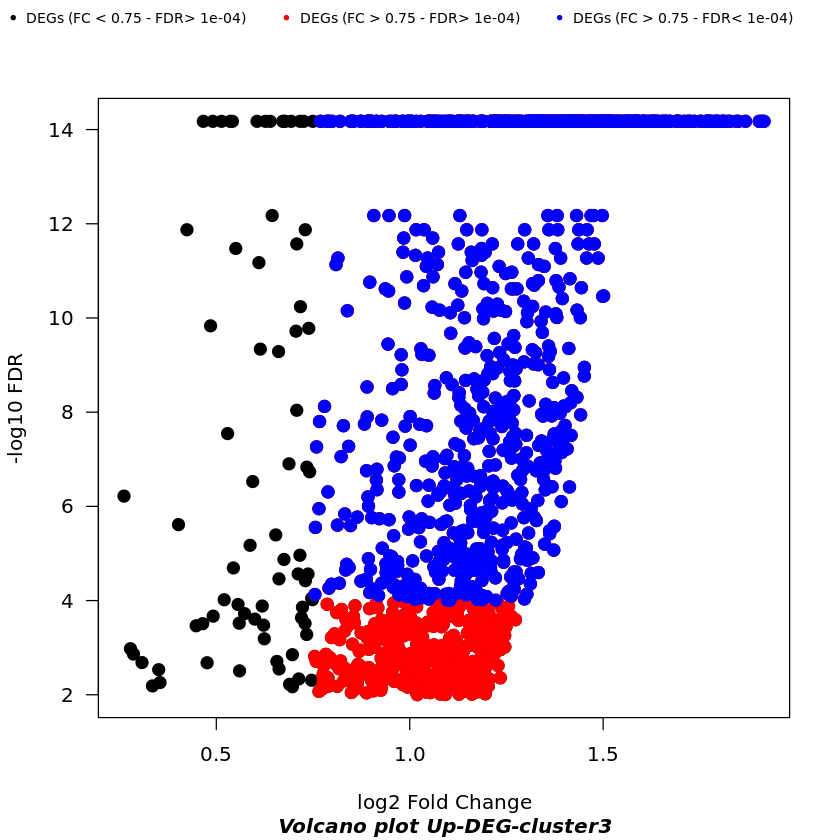

In [3]:
name<-"UpRegulated-DEG-cluster3"  ############ Selecting the DEGs'
U<-read.csv(file="UpRegulated-DEG-cluster3.csv",head=TRUE,sep=",")
Vplot<-VolcanoPlot(U,value=0.0001,name=name,FS=0.7,fc=0.75)

### 4. Identifying biomarkers (decision trees and networking analysis) 

In [4]:
###################### Finding biomarker genes between cluster 3 and cluster 4
First="CL3"
Second="CL4"
load("FGDATAforDT.RData")            # Preparing the dataset for the decision trees

### 4.1. J48 Decision Tree

J48 pruned tree
------------------

YWHAH <= 2.485448: CL3 (322.0/1.0)
YWHAH > 2.485448
|   PTCRA <= 0.844507
|   |   PEA15 <= 0.545646: CL4 (14.0/1.0)
|   |   PEA15 > 0.545646: CL3 (11.0)
|   PTCRA > 0.844507: CL4 (562.0)

Number of Leaves  : 	4

Size of the tree : 	7




=== Summary ===

Correctly Classified Instances         907               99.78   %
Incorrectly Classified Instances         2                0.22   %
Kappa statistic                          0.9953
Mean absolute error                      0.0042
Root mean squared error                  0.046 
Relative absolute error                  0.9123 %
Root relative squared error              9.5525 %
Total Number of Instances              909     

=== Confusion Matrix ===

   a   b   <-- classified as
 332   1 |   a = CL3
   1 575 |   b = CL4

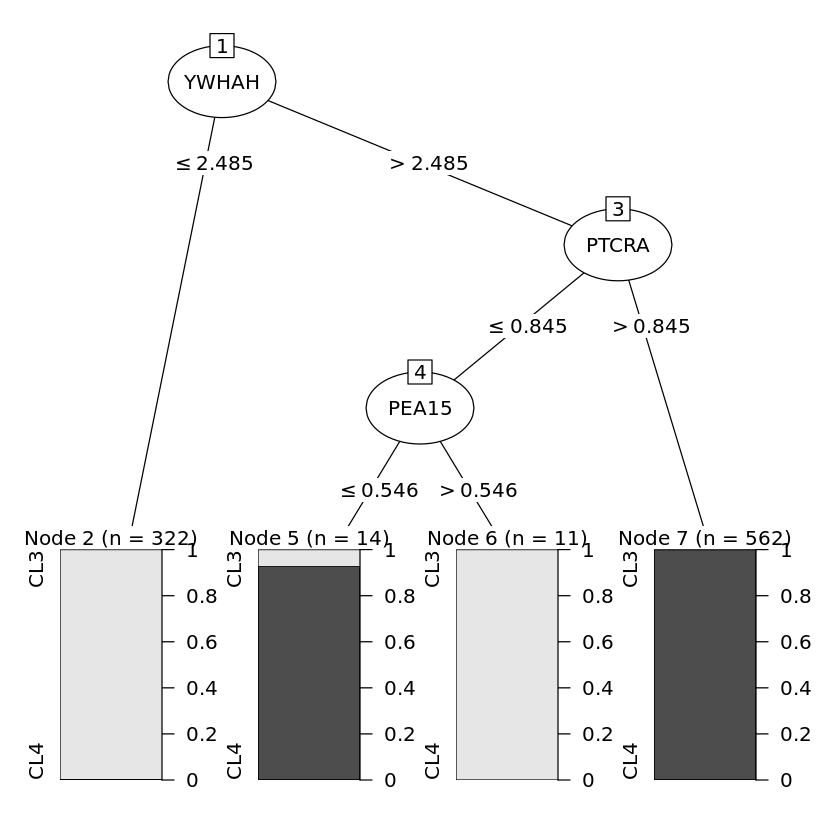

In [5]:
j48dt<-J48DT(FGDATAforDT)           #J48 Decision Tree
summary(j48dt)
rm(j48dt)

### 4.2. RPART Decision Tree

n= 909 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 909 333 CL4 (0.366336634 0.633663366)  
   2) YWHAH< 2.495651 322   1 CL3 (0.996894410 0.003105590)  
     4) RIOK3< 5.532748 321   0 CL3 (1.000000000 0.000000000) *
     5) RIOK3>=5.532748 1   0 CL4 (0.000000000 1.000000000) *
   3) YWHAH>=2.495651 587  12 CL4 (0.020442930 0.979557070)  
     6) PF4< 0.1469055 8   0 CL3 (1.000000000 0.000000000) *
     7) PF4>=0.1469055 579   4 CL4 (0.006908463 0.993091537)  
      14) DSTN>=7.45938 4   1 CL3 (0.750000000 0.250000000)  
        28) CFLAR< 6.60945 3   0 CL3 (1.000000000 0.000000000) *
        29) CFLAR>=6.60945 1   0 CL4 (0.000000000 1.000000000) *
      15) DSTN< 7.45938 575   1 CL4 (0.001739130 0.998260870)  
        30) TMEM132A>=1.087652 1   0 CL3 (1.000000000 0.000000000) *
        31) TMEM132A< 1.087652 574   0 CL4 (0.000000000 1.000000000) *


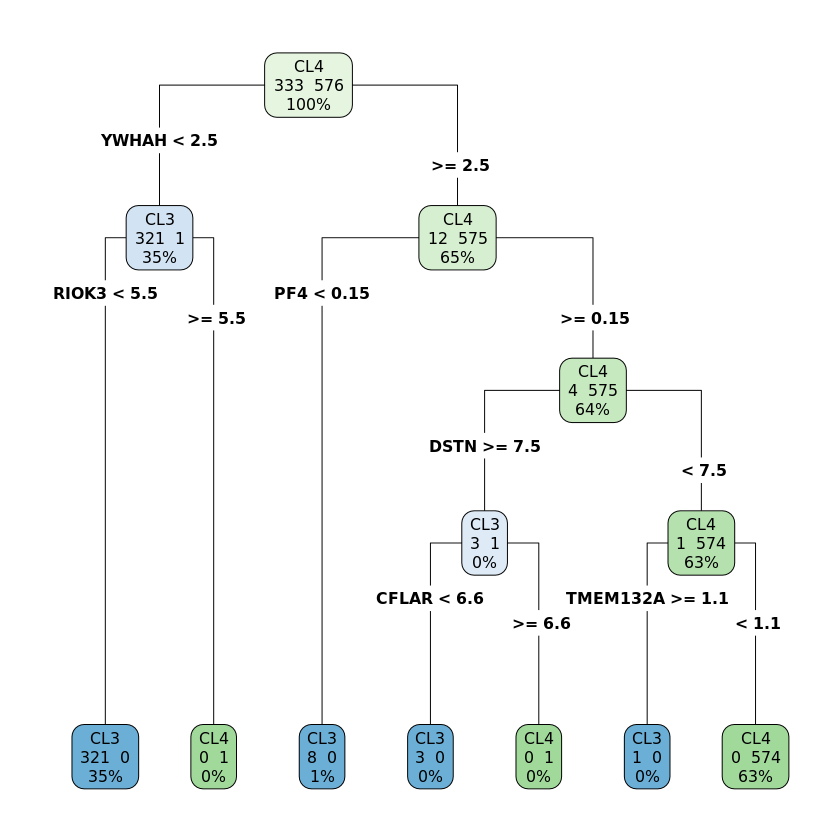

In [6]:
rpartDT<-RpartDT(FGDATAforDT)
rm(rpartDT)

### 4.3. Networking Analysis

In [7]:
############ Selecting the DEGs' table  ##############
data<-read.csv(file="Up-DEG-cluster3.csv",head=TRUE,sep=",")
data<-as.character(data[1:200,3])                              ## Checking the first 200 DEGs             

ppi<-PPI(data)

networking<-NetAnalysis(ppi)
networking                            ##### In case the Examine response components = 200 and an error "linkmat[i, ]" appeared, that means there are no PPI.

Examine response components = 200	(200 means successful)


No encoding supplied: defaulting to UTF-8.

Number of nodes: 170

Number of links: 576

Link Density: 3.38823529411765

The connectance of the graph: 0.020048729550992

Mean Distences2.7073837739289

Average Path Length2.7073837739289




,names,degree,betweenness
,<chr>,<dbl>,<dbl>
61,HSP90AA1,38,1249.639427
65,ACTB,26,861.030922
27,CDH1,24,353.052442
134,RPLP0,24,46.815110
117,RPL6,23,169.209038
17,ENO1,22,99.933333
58,HSPA5,21,377.308028
82,HSP90AB1,20,164.412599
12,AURKA,19,183.505189


Examine response components =200	(200 means successful)


You can see the network with high resolution by clicking on the following link:
https://string-db.org/api/highres_image/network?identifiers=FUCA2%0dCYP51A1%0dICA1%0dARF5%0dFKBP4%0dNDUFAB1%0dSLC25A5%0dITGA3%0dLAMP2%0dTMEM132A%0dCX3CL1%0dTNFRSF12A%0dRALA%0dBAIAP2L1%0dGGCT%0dARSD%0dPSMB1%0dTFAP2B%0dSYPL1%0dCYB561%0dMGST1%0dST3GAL1%0dUQCRC1%0dCD9%0dNME1-NME2%0dANLN%0dMAP4K3%0dLTF%0dELOVL5%0dUBR7%0dPSMC4%0dSLC25A39%0dMVP%0dPGM3%0dMDH1%0dMATR3%0dNUDCD3%0dWWTR1%0dRNH1%0dTOMM34%0dSEC63%0dVIM%0dCD44%0dVEZT%0dSLC39A9%0dGRN%0dTMSB10%0dRNF19A%0dSH3YL1%0dFAM136A%0dNSUN2%0dCDH1%0dPSMA4%0dLSG1%0dCAPG%0dCTNNA1%0dHSPA5%0dDSG2%0dTPR%0dMAP4%0dVAMP3%0dHEXB%0dLIMA1%0dHERPUD1%0dHEBP2%0dPRSS8%0dTTC17%0dPHPT1%0dSYNE2%0dNOP58%0dEIF2AK2%0dTRAF3IP2%0dGDI2%0dATG5%0dSEC61A1%0dCCAR1%0dMRPS35%0dGPBP1%0dCS%0dMRPS24%0dEIF4B%0dRPL18%0dLIMCH1%0dTAF2%0dSLC12A2%0dBCAS1%0dSLC9A3R2%0dIPO5%0dOAT%0dERBB3%0dNDUFB4%0dPFKP%0dIDI1%0dTNFRSF1A%0dIARS2%0dCOASY%0dLAPTM4A%0dPIT

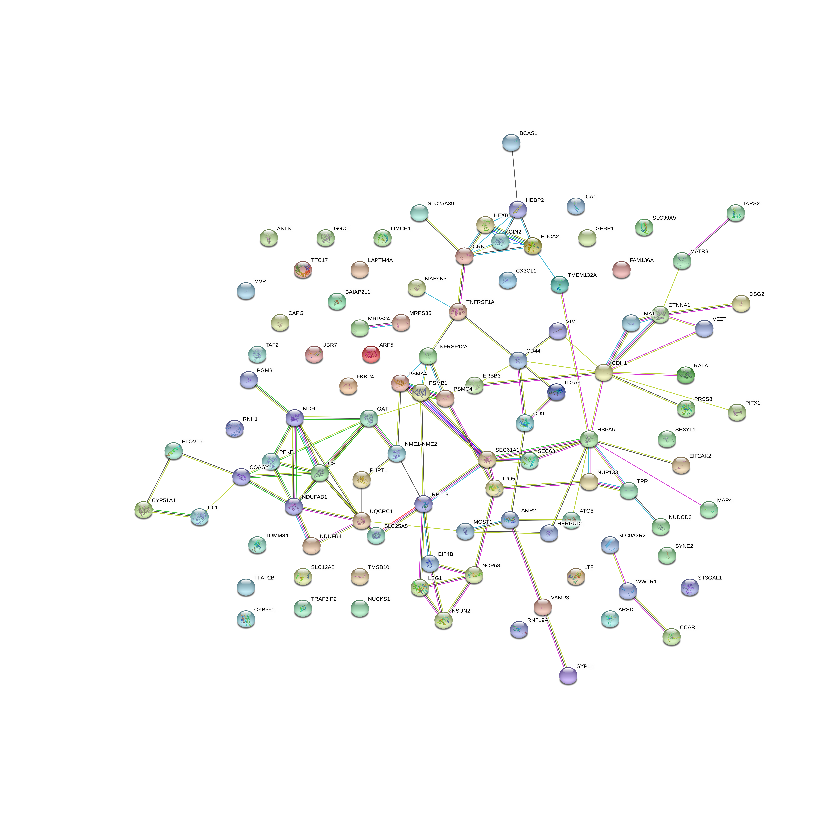

In [8]:
Data<-data[1:100]           ## Plotting the first 200 DEGs      
network<-Networking(Data)

### 4.4 Gene Enrichment Analysis

In [9]:
############ Selecting the DEGs' table  ##############
data<-read.csv(file="UpRegulated-DEG-cluster3.csv",head=TRUE,sep=",")  # Up-regulated genes in cluster 3 (from the Binomial analysis)
data<-as.character(data[,3])                              ## Checking the first 200 DEGs             

dbs <- c("KEGG_2013","GO_Biological_Process_2015")
enriched <- enrichr(data, dbs)
KEGG_2013<-enriched[[1]][,c(1,2,3,9)]
GO_Biological_Process_2015<-enriched[[2]][,c(1,2,3,9)]

GEA<-rbind(KEGG_2013,GO_Biological_Process_2015)
GEA

Uploading data to Enrichr... Done.
  Querying KEGG_2013... Done.
  Querying GO_Biological_Process_2015... Done.
Parsing results... Done.


Term,Overlap,P.value,Genes
<chr>,<chr>,<dbl>,<chr>
HSA03010 RIBOSOME,41/98,8.086123e-23,RPL30;RPL3;RPL31;RPL12;RPL11;RPL10A;MRPL13;RPL6;RPL7;RPS16;RPS15A;RPL18A;RPL14;RPS3;RPL13;RPL38;RPL37;RPS2;RPL18;RPS10;RPS13;RPS12;RPL19;RPL41;RPS7;RPS8;RPS5;RPS6;RPL13A;RPL35A;RPSA;RPS3A;MRPS7;RPS27;RPL37A;RPL24;RPL26;FAU;RPL29;RPS24;RPS23
HSA00190 OXIDATIVE PHOSPHORYLATION,43/128,1.776597e-19,NDUFB9;NDUFA13;NDUFA11;NDUFB10;NDUFB6;NDUFA12;NDUFB5;COX4I1;NDUFB4;NDUFA10;COX7A2;COX6A1;COX5B;COX5A;UQCRFS1;CYC1;NDUFV2;NDUFV1;ATP6V1C1;ATP6V1C2;COX8A;NDUFA9;NDUFA8;ATP6V1G1;ATP6V0B;NDUFA4;NDUFA2;NDUFA1;NDUFC2;SDHA;COX6C;SDHB;COX6B1;PPA2;NDUFS7;PPA1;UQCRQ;NDUFS6;NDUFAB1;UQCRC1;NDUFS3;NDUFS2;UQCRC2
HSA03050 PROTEASOME,17/22,2.063360e-16,PSMD12;PSMA7;PSMA5;PSMB6;PSMB7;PSMA6;PSMB4;PSMA3;PSMA4;PSMB5;PSMC3;PSMB2;PSMB3;PSMD2;PSMB1;PSMC2;PSMD1
HSA04110 CELL CYCLE,24/115,5.580463e-07,PCNA;GADD45B;MCM7;PRKDC;YWHAB;PLK1;PKMYT1;CDC25B;ANAPC11;CDC20;CCNB2;CCNB1;WEE1;TFDP1;CCND1;PTTG1;CCNE2;YWHAQ;CDK4;MCM3;MCM4;BUB3;SKP1;MCM2
HSA00240 PYRIMIDINE METABOLISM,19/89,5.806892e-06,DTYMK;DUT;RRM1;RRM2;ENTPD6;NME4;TYMS;NME1;POLD4;NT5E;POLR2A;POLD2;POLR3H;TK1;POLR2H;UMPS;POLR2I;POLR2K;POLR2L
HSA00020 CITRATE CYCLE,10/29,1.131130e-05,CS;FH;MDH1;IDH1;IDH2;IDH3B;SUCLG1;ACO2;SDHA;SDHB
HSA00100 BIOSYNTHESIS OF STEROIDS,9/24,1.429283e-05,VKORC1;FDPS;NQO1;IDI1;SQLE;CYP51A1;DHCR24;DHCR7;FDFT1
HSA03060 PROTEIN EXPORT,5/8,6.462897e-05,SRP19;SRP72;SRP54;SRP68;SRP9
HSA00010 GLYCOLYSIS AND GLUCONEOGENESIS,14/64,7.248821e-05,GPI;PDHA1;AKR1A1;ENO1;ALDH1A3;ALDH3B2;LDHA;PFKL;PGM3;ALDOA;FBP1;GAPDH;PFKP;ALDH9A1
